## Load in the data set

We import useful packages

In [1]:
# Standard includes
%matplotlib inline
%run helper.ipynb
import numpy as np
import matplotlib.pyplot as plt
from inspect import getsource
from scipy.stats import norm, multivariate_normal # module for dealing with the Gaussians

The object 'helper' has been imported into this notebook.


In [2]:
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

We load in the wine test and training datasets.
The dataset consists of 130 training points and 48 test points.
There are 13 features and a label with one of the values, (1,2,3).

* **x :** an `np.array` of the 130 training points' features.
* **y :** an `np.array` of the 130 training labels.
* **tx :** an `np.array` of the 48 test points' features.
* **ty :** an `np.array` of the 48 test points' labels.

In [3]:
x,y,tx,ty = helper.x, helper.y, helper.tx, helper.ty
print "x.shape :",x.shape
print "tx.shape :",tx.shape
print "y.shape :",y.shape
print "ty.shape :",ty.shape

featurenames = helper.featurenames
print;print "Names of Features:"; print featurenames

x.shape : (130, 13)
tx.shape : (48, 13)
y.shape : (130,)
ty.shape : (48,)

Names of Features:
['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


## Look at the distribution of two features from one of the wineries

We will be making use of the function helper.bi.fit_gaussian. The function's code is given below.

In [4]:
print getsource( helper.bi.fit_gaussian )

def fit_gaussian(x, features):
    mu = np.mean(x[:,features], axis=0)
    covar = np.cov(x[:,features], rowvar=0, bias=1)
    return mu, covar



This time we'll use two features: 'Alcohol' (feature #0) and 'Flavanoids' (feature #6). 

Fit a Gaussian to label 1, using just these two features. Show the parameters of the Gaussian.

In [5]:
f1 = 0
f2 = 6
features = [f1, f2]
label = 1
mu, covar = helper.bi.fit_gaussian(x[y==label,:], features)
print "Mean:\n" + str(mu)
print "Covariance matrix:\n" + str(covar)

Mean:
[ 13.72023256   2.96348837]
Covariance matrix:
[[ 0.20046739  0.05571779]
 [ 0.05571779  0.12084132]]


Now display the training points for label 1, restricted to the two selected features.
Also show a few contour lines of the Gaussian fit.

In [6]:
interact_manual( helper.bi.twoFeaturesPlot,
                f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1), label=IntSlider(1,1,3,1),
                )

<function __main__.twoFeaturesPlot>

### <font color="magenta">*Fast Exercise*</font>

Try changing the features and labels in the graph to see how the graph changes. Can you guess what the graph would look like if f1 and f2 were the same feature? Do you think it would look <font color="blue">"random"</font>, <font color="blue">"linear"</font>, or a <font color="blue">"single_dot"</font>?

Write a function, **sameFeatureGraph**, that returns the type of graph you believe you would see from plotting the same feature on the x and y axis.

In [7]:
# modify this cell

def sameFeatureGraph():
    # inputs: no inputs
    # output: return either "random", "linear", or "single_dot"
    
    ### BEGIN SOLUTION
    return "linear"
    ### END SOLUTION

In [8]:
assert sameFeatureGraph() == "linear"

## Fit a Gaussian to each class

We define a function that fits a Gaussian generative model to the three classes. The code for the function is below.

In [7]:
print getsource( helper.bi.fit_generative_model )

def fit_generative_model(x, y, features):
    k = len(np.unique(y)) # number of classes in y
    d = len(features) # number of features
    mu = np.zeros((k+1,d)) # list of means
    covar = np.zeros((k+1,d,d)) # list of covariance matrices
    pi = np.zeros(k+1) # list of class weights
    for label in range(1,k+1):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = helper.bi.fit_gaussian(x[indices,:], features)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi



Call this function on the features 'alcohol' and 'flavanoids'.

In [8]:
f1 = 0 # alcohol
f2 = 6 # flavanoids
features = [f1,f2] 
mu, covar, pi = helper.bi.fit_generative_model(x, y, features)

Let's look at the means of the three classes

In [9]:
mu

array([[  0.        ,   0.        ],
       [ 13.72023256,   2.96348837],
       [ 12.29215686,   2.05254902],
       [ 13.15777778,   0.79972222]])

Next, display the Gaussian distribution for each of the three classes.

In [10]:
interact_manual( helper.bi.threeGaussiansPlot, f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1) )

<function __main__.threeGaussiansPlot>

### <font color="magenta">*Fast Exercise*</font>

Try running the gaussian plots for different features.

## Prediction time

How well we can predict the class (1,2,3) based just on these two features?

We start with a testing procedure that is analogous to what we developed in the 1-d case.

In [11]:
# Now test the performance of a predictor based on a subset of features
interact( helper.bi.test_model, f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1) )

<function __main__.test_model>

### <font color="magenta">*Fast Exercise*</font>

Look at other pairs of features, and see what kinds of test errors result. Which feature, whe combined with <font color="blue">"Magnesuim"</font>, produces the smallest `Test error` ?

Write a function, **MagnesiumAndWhat**, that returns the name of the feature to the question above.

In [14]:
# modify this cell

def MagnesiumAndWhat():
    # inputs: no inputs
    # output: return a feature name, like: 'Alcohol', 'Flavanoids', or 'Color intensity'
    
    ### BEGIN SOLUTION
    return "Flavanoids"
    ### END SOLUTION

In [15]:
assert MagnesiumAndWhat() == 'Flavanoids'

## The decision boundary 

We now plot the decision boundary between the three classes, as found above. It takes a few minutes to do all its calculations.

This code is done for f1=0 [Alcohol] and f2=6 [Flavanoids]

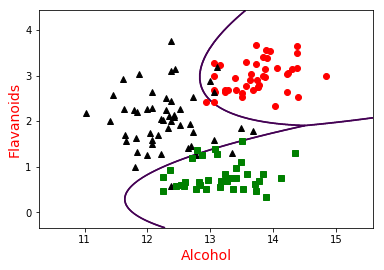

In [16]:
helper.bi.plot_boundary(0,6)